In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
from icecream import ic
import csv
filename = '/../Academics/Semester7/BTP/Algo_Modification_TestCases/Data.csv'

In [3]:
a = 5
b = 7
c = ic(a + b)
ic(a, b)

ic| a + b: 12
ic| a: 5, b: 7


(5, 7)

In [4]:
x = 0

0.5240649028622384


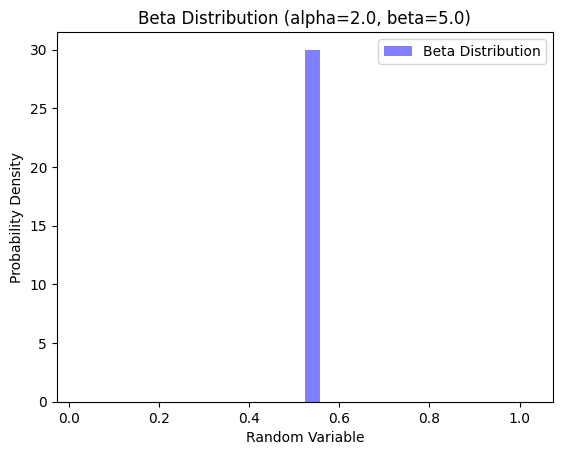

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the shape parameters alpha and beta
alpha = 2.0  # Shape parameter
beta = 5.0   # Shape parameter

# Number of random samples
num_samples = 1

# Generate random variables from the beta distribution
beta_samples = np.random.beta(alpha, beta, num_samples)[0]
print(beta_samples)

# Plot a histogram to visualize the distribution
plt.hist(beta_samples, bins=30, density=True, alpha=0.5, color='b', label='Beta Distribution')
plt.xlabel('Random Variable')
plt.ylabel('Probability Density')
plt.title('Beta Distribution (alpha={}, beta={})'.format(alpha, beta))
plt.legend()
plt.show()


# Functions required

In [6]:
def get_margins(mu, N, M, t, T, delta):
    # delta = 0.1
    val1 = N*(M+1)/2/delta
    val2 = t**3
    val = val1*val2
    # print(val)
    log_term = math.log(val)
    sqrt_term = log_term/2/T
    alpha = math.sqrt(sqrt_term)
    LCB = mu - alpha
    UCB = mu + alpha
    return LCB, UCB

In [7]:
def get_feasible_set(mu_th, UCB_attr):
    ## mu_attr will be an array with the current means of all attributes of the specific arm
    ## same for UCB and LCB things
    feasible_set = []
    ## here mu_attr would be a 2D array with all the means
    ## same for LCB (LCB_attr)
    n = len(UCB_attr)
    m = len(UCB_attr[0])
    for i in range (n):
        ## for each arm
        found = False
        UCB_min = min(UCB_attr[i])
        if (UCB_min >= mu_th):
            feasible_set.append(i)

    return feasible_set

In [8]:
def get_perfect_feasible_set(mu_th, LCB_attr):
    feasible_set = []
    ## here mu_attr would be a 2D array with all the means
    ## same for LCB (LCB_attr)
    # n = len(LCB_attr)
    n = len(LCB_attr)
    for i in range (n):
        ## for each arm
        LCB_min  = min(LCB_attr[i])
        if (LCB_min >= mu_th):
            feasible_set.append(i)

    return feasible_set

In [9]:
def get_potential_set(i_star_t, LCB_i_star, UCB):
    ## here UCB will be an array for UCB of means of all the arms
    potent = []
    for i in range(len(UCB)):
        if ((LCB_i_star <= UCB[i]) and (i != i_star_t)):
            potent.append(i)
    return potent

In [10]:
def best_arm(mu, feasible_set):
    ## for arms in feasible set, we need to find the arm with maximum mean
    # if len(feasible_set) == 0: return 0
    best = feasible_set[0]
    for arm in feasible_set:
        if(mu[arm] >= mu[best]):
            best = arm
    return best

In [11]:
def intersection(lst1, lst2):
    temp = set(lst2)
    lst3 = [value for value in lst1 if value in temp]
    return lst3

In [12]:
def potentially_competitor_arm(UCB, feasible_set, potentially_best_arm):
    if (potentially_best_arm != feasible_set[0]):
        best = feasible_set[0]
    else:
        best = feasible_set[1]
    for arm in feasible_set:
        if (arm != potentially_best_arm):
            if((UCB[arm] > UCB[best])):
                best = arm
    # print("pot: ", potentially_best_arm, "ct: ", best)
    return best

In [13]:
def get_suboptimal_arm(mu_i_star, mu_i, arms_set):
    suboptimal = []
    for arms in arms_set:
        if (mu_i[arms] < mu_i_star):
            suboptimal.append(arms)

    return suboptimal

In [14]:
def difference(li1, li2):
    s = set(li2)
    temp3 = [x for x in li1 if x not in s]
    return temp3

In [15]:
def get_perfect_feasible_attr_set(mu_th, LCB_attr):
    perfect_feasible = []
    for i in range (len(LCB_attr)):
        for j in range (len(LCB_attr[0])):
            if LCB_attr[i][j] >= mu_th:
                perfect_feasible.append([i, j])

    return perfect_feasible

In [16]:
def get_possibly_feasible_attr_set(mu_th, LCB_attr, UCB_attr):
    ans = []
    # N, M = len(LCB_attr), len(UCB_attr)
    # print(N, M)
    for i in range(len(LCB_attr)):
        for j in range (len(UCB_attr[0])):
            if LCB_attr[i][j] < mu_th and UCB_attr[i][j] >= mu_th:
                ans.append([i, j])
    return ans

# Oracle

In [33]:
class Oracle:
    def __init__(self, M, N, mu_th) -> None:
        self.M = M
        self.N = N
        arms = 5
        attributes = 5
        self.mu_ij = [[0 for i in range (attributes)] for j in range (arms)]
        self.ab_array = [[[0, 0] for i in range (attributes)] for j in range (arms)]
        self.mu_i = [0 for i in range (arms)]

        self.mu_th = mu_th
        
        ## fixing alpha at 1

        self.ab_array[0] = np.array([[1, 0.43], [1, 0.67], [1, 0.25], [1, 0.43], [1, 0.11]])               
        self.ab_array[1] = np.array([[1, 0.43], [1, (1/x)-1], [1, 0.43], [1, 0.43], [1, 0.25]])       
        self.ab_array[2] = np.array([[1, 5.67], [1, 0.43], [1, 0.25], [1, 0.11], [1, 0.11]])              
        self.ab_array[3] = np.array([[1, 5.67], [1, 0.11], [1, 0.11], [1, 0.11], [1, 0.25]])                  
        self.ab_array[4] = np.array([[1, 9], [1, 0.11], [1, 0.11], [1, 0.25], [1, 0.25]])    

        for i in range (arms):
            for j in range (attributes):
                alpha = self.ab_array[i][j][0]
                beta = self.ab_array[i][j][1]
                self.mu_ij[i][j] = alpha / (alpha + beta)


        for i in range (len(self.mu_i)):
            self.mu_i[i] = sum(self.mu_ij[i])/attributes

    def play(self, arm, attr):
        alpha, beta = self.ab_array[arm][attr]
        reward = np.random.beta(alpha, beta, 1)[0]
        return reward
    
    def hardness(self):
        self.i_star = 0                 ## best arm in the feasible set
        self.i_star_star = self.N            ## best arm in suboptimal set

        self.delta_i = [0 for i in range (self.N)]
        self.delta_ij = [[0 for i in range (self.M)] for j in range (self.N)]
        self.delta_i_attr = [0 for i in range (self.N)]

         ### assume that always i_star is 0 ###
        
        all_arms = list(range(0, self.N))

        self.perfect_feasible = get_perfect_feasible_set(self.mu_th, self.mu_ij)
        self.i_star = best_arm(self.mu_i, self.perfect_feasible)

        self.suboptimal = get_suboptimal_arm(self.mu_i[self.i_star], self.mu_i, all_arms)
        if len(self.suboptimal) != 0:
            self.i_star_star = best_arm(self.mu_i, self.suboptimal)
        
        self.risky = difference(all_arms, self.suboptimal)
        self.infeasible = difference(all_arms, self.perfect_feasible) 

        for i in range (self.N):
            if (i != self.i_star):
                self.delta_i[i] = self.mu_i[self.i_star] - self.mu_i[i]
                self.delta_i_attr[i] = abs(min(self.mu_ij[i]) - self.mu_th)

        if self.i_star_star < self.N:                                                                           ### the suboptimal set has elements greater than zero
            self.delta_i[self.i_star] = self.delta_i[self.i_star_star]
        else:
            self.delta_i[self.i_star] = math.inf
            
        self.delta_i_attr[self.i_star] = abs(min(self.mu_ij[self.i_star]) - self.mu_th)

        return self.delta_i[self.i_star], self.delta_i_attr
    
    def H_index(self):
        self.i_star = 0                 ## best arm in the feasible set
        self.i_star_star = self.N            ## best arm in suboptimal set

        self.delta_i = [0 for i in range (self.N)]
        self.delta_ij = [[0 for i in range (self.M)] for j in range (self.N)]
        self.delta_i_attr = [0 for i in range (self.N)]

         ### assume that always i_star is 0 ###
        
        all_arms = list(range(0, self.N))

        self.perfect_feasible = get_perfect_feasible_set(self.mu_th, self.mu_ij)
        self.i_star = best_arm(self.mu_i, self.perfect_feasible)

        self.suboptimal = get_suboptimal_arm(self.mu_i[self.i_star], self.mu_i, all_arms)
        if len(self.suboptimal) != 0:
            self.i_star_star = best_arm(self.mu_i, self.suboptimal)
        
        self.risky = difference(all_arms, self.suboptimal)
        self.infeasible = difference(all_arms, self.perfect_feasible) 

        for i in range (self.N):
            if (i != self.i_star):
                self.delta_i[i] = self.mu_i[self.i_star] - self.mu_i[i]
                self.delta_i_attr[i] = abs(min(self.mu_ij[i]) - self.mu_th)

        if self.i_star_star < self.N:                                                                           ### the suboptimal set has elements greater than zero
            self.delta_i[self.i_star] = self.delta_i[self.i_star_star]
        else:
            self.delta_i[self.i_star] = math.inf
        self.delta_i_attr[self.i_star] = abs(min(self.mu_ij[self.i_star]) - self.mu_th)
        # print(self.delta_i_attr)

        self.set1 = intersection(self.perfect_feasible, self.suboptimal)
        self.set2 = intersection(self.infeasible, self.risky)
        self.set3 = intersection(self.infeasible, self.suboptimal)

        h0_den = (min(self.delta_i[self.i_star]/2, self.delta_i_attr[self.i_star]))**2
        h0 = 1/h0_den

        h1 = 0
        for i in self.set1:
            h1 += 4/(self.delta_i[i])**2

        h2 = 0
        for i in self.set2:
            h2 += 1/(self.delta_i_attr[i])**2

        h3 = 0
        for i in self.set3:
            h3 += 1/(max(self.delta_i[i]/2, self.delta_i_attr[i]))**2
            # h3 += 5*np.exp((1/(max(self.delta_i[i]/2, 2*self.delta_i_attr[i]))**2)/192)

        h_index = h0 + h1 + h2 + h3
        # print(self.delta_i_attr[1])
        # print(h0, h1, h2, h3)
        # print(self.set2)

        return h_index
    

    # def H_index_old(self):
    #     self.i_star = 0                 ## best arm in the feasible set
    #     self.i_star_star = 1            ## best arm in suboptimal set

    #     self.delta_i = [0 for i in range (self.N)]
    #     self.delta_ij = [[0 for i in range (self.M)] for j in range (self.N)]
    #     self.delta_i_attr = [0 for i in range (self.N)]

    #      ### assume that always i_star is 0 ###
    #     for i in range (1, self.N):
    #         self.delta_i[i] = self.mu_i[self.i_star] - self.mu_i[i]
    #         self.delta_i_attr[i] = abs(min(self.mu_ij[i]) - self.mu_th)

    #     self.delta_i[self.i_star] = self.delta_i[self.i_star_star]
    #     self.delta_i_attr[self.i_star] = abs(min(self.mu_ij[self.i_star]) - self.mu_th)
    #     # print(self.delta_i_attr)

    #     all_arms = list(range(0, self.N))


        

# Main function

In [18]:
def game(M, N, mu_th, delta):
    T_t_attr = [[0 for i in range (M)] for j in range (N)]
    T_t = [0 for i in range(N)]
    t = 1
    theGame = Oracle(M, N, mu_th)

    h_idx, h_idx_old = 0, 0
    # h_idx_old = theGame.H_index_old()
    
    
    h_idx = theGame.H_index()
    # h_idx = 0



    delta_i, delta_i_attr = theGame.hardness()

    mu_hat_i = [0 for i in range (N)]
    mu_hat_ij = [[0 for i in range (M)] for j in range (N)]

    LCB = [0 for i in range (N)]
    UCB = [0 for i in range (N)]
    alpha = [0 for i in range (N)]

    LCB_attr = [[0 for i in range (M)] for j in range (N)]
    UCB_attr = [[0 for i in range (M)] for j in range (N)]

    T_unif = 20

    for j in range (T_unif):
        ## 20 times uniform exploration
        for i in range (N):
            for k in range (M):
                reward_arm = theGame.play(i, k)
                mu_hat_ij[i][k] = (mu_hat_ij[i][k] * T_t_attr[i][k] + reward_arm)/(T_t_attr[i][k] + 1)
                T_t_attr[i][k] += 1
            mu_hat_i[i] = sum(mu_hat_ij[i])/M
            # T_t[i] = sum(T_t_attr[i])
            T_t[i] = min(T_t_attr[i])
            

    all_arms = list(range(0, N))
    feasible = list(range(0, N))
    t += N*T_unif*M

    ### further pulls

    while(True):
        ## arm wise margins
        for i in range (N):
            LCB[i], UCB[i] = get_margins(mu_hat_i[i], N, M, t, T_t[i], delta)
            alpha[i] = mu_hat_i[i] - LCB[i]

        ## attribute wise margins
        for i in range (N):
            for j in range (M):
                LCB_attr[i][j], UCB_attr[i][j] = get_margins(mu_hat_ij[i][j], N, M, t, T_t_attr[i][j], delta)

        # print("t: ", t, "T: ", T_t, "alpha: ", alpha, "mu: ", mu_hat_i)

        perfect_feasible = get_perfect_feasible_set(mu_th, LCB_attr)
        feasible = get_feasible_set(mu_th, UCB_attr)

        perfect_feasible_attr = get_perfect_feasible_attr_set(mu_th, LCB_attr)                  ## this is the surely feasible set
        possibly_feasible_attr = get_possibly_feasible_attr_set(mu_th, LCB_attr, UCB_attr)               ## this is the dell f set
        feasible_attr = []
        for elem in perfect_feasible_attr:
            feasible_attr.append(elem)
        for elem in possibly_feasible_attr:
            feasible_attr.append(elem)
        ### here each entry will be an array with values [arm, attr]

        if(len(perfect_feasible) != 0):
            i_star_t = best_arm(mu_hat_i, perfect_feasible)
        else:
            i_star_t = mu_hat_i.index(max(mu_hat_i))

        if (len(feasible) != 0):
            i_t = best_arm(mu_hat_i, feasible)

        ## potential set is the set of arms which have more UCB than the  current best arm mean, irrespective of feasibility
        if (len(perfect_feasible) == 0):
            potential = all_arms
        else:
            potential = get_potential_set(i_star_t, LCB[i_star_t], UCB)
        
        pot_intersect_feas = intersection(potential, feasible)

        # print("Feasible: ", feasible, "Perfect feasible: ", perfect_feasible, "Potential: ", potential, "mu_hat for all", mu_hat_i, "UCB of all: ", UCB, "LCB for all: ", LCB)
        # print("Feasible: ", feasible, "Attribute feasible: ", possibly_feasible_attr, "Potential: ", potential, "i_t:", i_t, "alpha: ", alpha, "T_t: ", T_t, "T_t_attr: ", T_t_attr)
        #  "i_t: ", i_t, "i_star: ", i_star_t,
        # ic(feasible, perfect_feasible, potential, mu_hat_i, alpha, i_t)
        


        ## Stopping criteria

        # print("Perfect feasible: ", perfect_feasible, "Feasible: ", feasible, "mu_Hat: ", mu_hat_i)

        if (len(pot_intersect_feas) == 0):
            if(len(perfect_feasible) == 0):
                f_hat = 0
                i_out = N
            else:
                f_hat = 1
                i_out = i_t
            return i_out, f_hat, t, h_idx_old, h_idx, delta_i, delta_i_attr

        
        if (len(feasible) == 1):
            i_t = best_arm(mu_hat_i, difference(feasible, perfect_feasible))
            t_copy = t
            for arm, attr in feasible_attr:
                if arm == i_t:
                    ### pull arm, attr
                    reward = theGame.play(arm, attr)
                    mu_hat_ij[arm][attr] = (mu_hat_ij[arm][attr] * T_t_attr[arm][attr] + reward)/(T_t_attr[arm][attr] + 1)
                    T_t_attr[arm][attr] += 1
                    t += 1

            mu_hat_i[i_t] = sum(mu_hat_ij[i_t])/M
            # T_t[i_t] = sum(T_t_attr[i_t])
            T_t[i_t] = min(T_t_attr[i_t])

        else:
            i_t = best_arm(mu_hat_i, feasible)
            c_t = potentially_competitor_arm(UCB, feasible, i_t)
            # print("else part")
            # print("Feasible: ", feasible, "Attribute Possibly feasible: ", possibly_feasible_attr, "Attribute feasible: ", feasible_attr, "Potential: ", potential, "i_t:", i_t, "c_t: ", c_t, "alpha: ", alpha, "T_t: ", T_t, "T_t_attr: ", T_t_attr, "UCB: ", UCB)
            # print("Feasible: ", feasible, "Perfect feasible: ", perfect_feasible, "possibly feasible attr: ", possibly_feasible_attr, "i_t: ", i_t, "i_star: ", i_star_t)
            t_copy = t
            # for arm, attr in possibly_feasible_attr:
            for arm, attr in feasible_attr:
                if arm == i_t or arm == c_t:
                    ### pull arm, attr
                    reward = theGame.play(arm, attr)
                    mu_hat_ij[arm][attr] = (mu_hat_ij[arm][attr] * T_t_attr[arm][attr] + reward)/(T_t_attr[arm][attr] + 1)
                    T_t_attr[arm][attr] += 1
                    t += 1

            mu_hat_i[i_t] = sum(mu_hat_ij[i_t])/M
            mu_hat_i[c_t] = sum(mu_hat_ij[c_t])/M
            # T_t[i_t] = sum(T_t_attr[i_t])
            # T_t[c_t] = sum(T_t_attr[c_t])

            T_t[i_t] = min(T_t_attr[i_t])
            T_t[c_t] = min(T_t_attr[c_t])



# Tests

## Single instance

Base Case: with 5 arms

In [40]:
# self.mu_ij[0] = np.array([0.5, 1])            #0.75 to 0.85
# self.mu_ij[1] = np.array([0.4, 0.4])        #0.4
# self.mu_ij[2] = np.array([0.2, 0.4])        #0.3
# self.mu_ij[3] = np.array([0.1, 0.5])        #0.3
# self.mu_ij[4] = np.array([0.5, 0.3])        #0.4

# self.ab_array[0] = np.array([[1, (1/0.5) - 1], [1, 0.01]])        #0.75 to 0.85
# self.ab_array[1] = np.array([[1, 1.5], [1, 1.5]])            #0.4
# self.ab_array[2] = np.array([[1, 4], [1, 1.5]])              #0.3
# self.ab_array[3] = np.array([[1, 9], [1, 1]])                #0.3
# self.ab_array[4] = np.array([[1, 1], [1, 2.33]])             #0.4

# mu_th = 0.45
## x = 0.5, 0.55

In [30]:
N = 5
M = 2
x = 0.6
best_arm_identified = []
delta_ins = 0.1
N_iter = 1
count = [0 for i in range (N+1)]
samples_all = []

samples_ins = []
x_val = []
time_bound = []
prob_success = []

for i in range (N_iter):
    # best_arm_guess, f, samples, h_idx_old, h_idx = game(M, N, mu_th=0.4, delta=0.1)
    # samples_all.append(samples)
    # best_arm_identified.append(best_arm_guess)
    # count[best_arm_guess] += 1
    # print(count)
    best_arm_guess, f, samples, h_idx_old, h_idx, delta_i, delta_i_attr = game(M, N, mu_th=0.55, delta=delta_ins)
    samples_all.append(samples)
    count[best_arm_guess] += 1

samples_ins.append(sum(samples_all)/N_iter)
# # x_val.append(x)
x_val.append(1/delta_i)
# time = h_idx * math.log(h_idx/delta_ins)
# time_bound.append(time)
# prob_success.append(count[0]/N_iter)
print("Done")
print(samples_ins)


Done
[62453.0]


In [ ]:
print(h_idx_old, h_idx)

0 301.54675758036063


## Multiple Instances

#### Case 1a: 

In [19]:
# self.ab_array[0] = np.array([[1, 1], [1, 0.67], [1, 0.43], [1, 0.43], [1, 0.25]])               
# self.ab_array[1] = np.array([[1, (1/x)-1], [1, 4], [1, 1], [1, 0.43], [1, 0.25]])       
# self.ab_array[2] = np.array([[1, 5.67], [1, 0.43], [1, 0.25], [1, 0.11], [1, 0.11]])              
# self.ab_array[3] = np.array([[1, 4], [1, 0.43], [1, 0.11], [1, 0.11], [1, 0.25]])                  
# self.ab_array[4] = np.array([[1, 9], [1, 0.11], [1, 0.11], [1, 0.25], [1, 0.25]])                

# mu_th = 0.3

In [21]:
N = 5
M = 5
N_iter = 50
delta_ins = 0.1

samples_ins = []
x_val = []
time_bound = []
prob_success = []

for x in [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]:
# for x in [0.7, 0.75, 0.8, 0.85, 0.9]:
    count = [0 for i in range (N+1)]
    samples_all = []
    for i in range (N_iter):
        best_arm_guess, f, samples, h_idx_old, h_idx, delta_i, delta_i_attr = game(M, N, mu_th=0.3, delta=delta_ins)
        samples_all.append(samples)
        count[best_arm_guess] += 1

    samples_ins.append(sum(samples_all)/N_iter)
    # x_val.append(x)
    x_val.append(h_idx)
    time = h_idx * math.log(h_idx/delta_ins)
    time_bound.append(time)
    prob_success.append(count[0]/N_iter)
    print("Done")

Done
Done
Done
Done
Done
Done
Done
Done
Done


In [22]:
print(x_val)
print(samples_ins)

[548.9425917722157, 602.2706961776596, 672.4524636577526, 767.4169936016901, 900.3703203538819, 1094.6475832338856, 1394.696719404453, 1893.9596138924182, 2817.5059989308847]
[37837.6, 37591.6, 37755.6, 36734.2, 36418.8, 36707.0, 36237.8, 36230.6, 35558.6]


In [45]:
with open(filename, 'r') as file:
    # Create a CSV reader object
    reader = csv.reader(file)

    # Create a list to store the rows
    rows = []

    # Iterate over each row in the CSV file
    for row in reader:
        # Append the row to the list
        rows.append(row)

    # Modify the 4th row
    rows[0] = x_val
    rows[3] = samples_ins

# Open the CSV file in write mode
with open(filename, 'w', newline='') as file:
    # Create a CSV writer object
    writer = csv.writer(file)

    # Write the modified rows to the CSV file
    writer.writerows(rows)

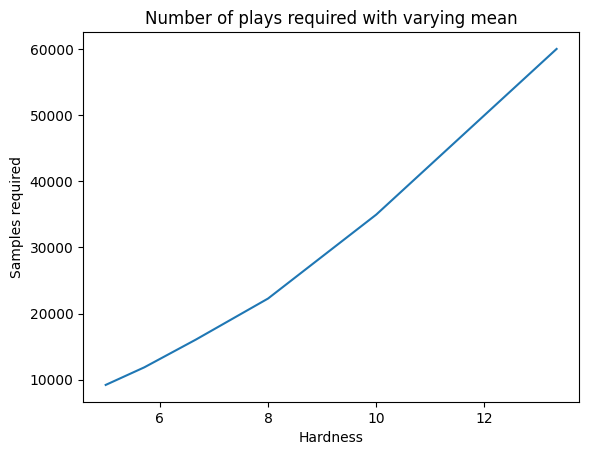

In [46]:
plt.title("Number of plays required with varying mean")
plt.xlabel("Hardness")
plt.ylabel("Samples required")
plt.plot(x_val, samples_ins)
plt.show()

[16874.94393203  9848.03172529  6619.21818641  4851.22669775
  3592.43263262  2764.12069733]


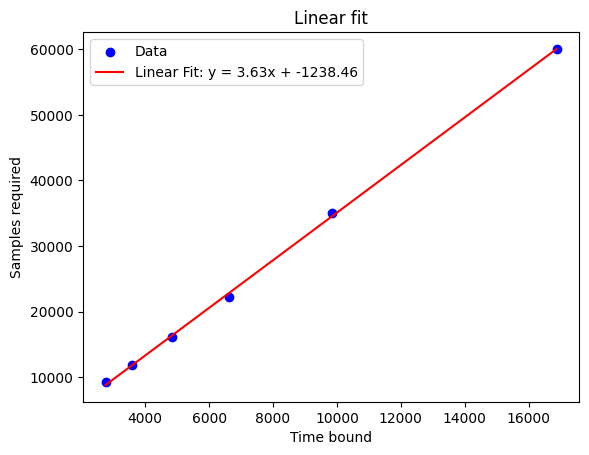

In [47]:
slope, intercept = np.polyfit(time_bound, samples_ins, 1)
time_bound_arr = np.array(time_bound)
print(time_bound_arr)
regression_line = slope * time_bound_arr + intercept
plt.scatter(time_bound, samples_ins, label='Data', color='blue')
plt.plot(time_bound_arr, regression_line, label=f'Linear Fit: y = {slope:.2f}x + {intercept:.2f}', color='red')
plt.xlabel("Time bound")
plt.ylabel("Samples required")
plt.legend()
plt.title("Linear fit")
plt.show()

In [48]:
print(samples_ins)

[60042.2, 34973.8, 22271.8, 16063.0, 11866.6, 9203.0]


In [23]:
print(prob_success)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


#### Case 1b

In [25]:
# self.ab_array[0] = np.array([[1, (1/x)-1], [1, 0.67], [1, 0.43], [1, 0.67], [1, 0.43]])               
# self.ab_array[1] = np.array([[1, 1.5], [1, 4], [1, 1.5], [1, 1.5], [1, 01.5]])       
# self.ab_array[2] = np.array([[1, 5.67], [1, 0.43], [1, 0.25], [1, 0.11], [1, 0.11]])              
# self.ab_array[3] = np.array([[1, 5.67], [1, 0.11], [1, 0.11], [1, 0.11], [1, 0.25]])                  
# self.ab_array[4] = np.array([[1, 9], [1, 0.11], [1, 0.11], [1, 0.25], [1, 0.25]])                

# mu_th = 0.3

In [27]:
N = 5
M = 5
N_iter = 10
delta_ins = 0.1

samples_ins = []
x_val = []
time_bound = []
prob_success = []

for x in [0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35]:
# for x in [0.7, 0.75, 0.8, 0.85, 0.9]:
    count = [0 for i in range (N+1)]
    samples_all = []
    for i in range (N_iter):
        best_arm_guess, f, samples, h_idx_old, h_idx, delta_i, delta_i_attr = game(M, N, mu_th=0.3, delta=delta_ins)
        samples_all.append(samples)
        count[best_arm_guess] += 1

    samples_ins.append(sum(samples_all)/N_iter)
    # x_val.append(x)
    x_val.append(h_idx)
    time = h_idx * math.log(h_idx/delta_ins)
    time_bound.append(time)
    prob_success.append(count[0]/N_iter)
    print("Done")


Done
Done
Done
Done
Done
Done
Done
Done
Done


In [28]:
print(x_val)
print(samples_ins)

[10195.520012032839, 4639.230694842275, 2694.062327226971, 1793.3480674143113, 1303.7544108434367, 1008.2743873415308, 816.2615746297865, 684.4114537321439, 589.9158558457617]
[1200863.5, 524626.5, 288339.5, 192768.5, 143572.0, 106061.0, 84478.5, 67308.0, 59749.5]


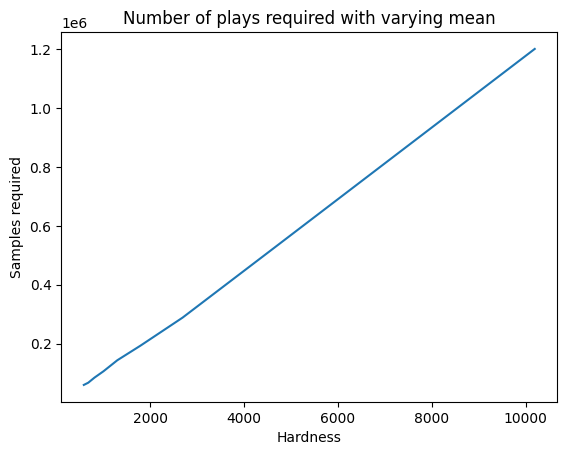

In [29]:
plt.title("Number of plays required with varying mean")
plt.xlabel("Hardness")
plt.ylabel("Samples required")
plt.plot(x_val, samples_ins)
plt.show()

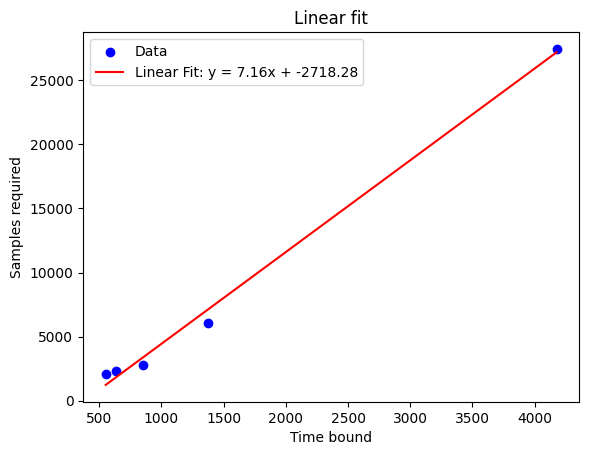

In [97]:
slope, intercept = np.polyfit(time_bound, samples_ins, 1)
time_bound_arr = np.array(time_bound)
regression_line = slope * time_bound_arr + intercept
plt.scatter(time_bound, samples_ins, label='Data', color='blue')
plt.plot(time_bound_arr, regression_line, label=f'Linear Fit: y = {slope:.2f}x + {intercept:.2f}', color='red')
plt.xlabel("Time bound")
plt.ylabel("Samples required")
plt.legend()
plt.title("Linear fit")
plt.show()

In [30]:
print(samples_ins)

[1200863.5, 524626.5, 288339.5, 192768.5, 143572.0, 106061.0, 84478.5, 67308.0, 59749.5]


In [31]:
print(prob_success)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


#### Case 2

In [ ]:
# self.ab_array[0] = np.array([[1, 0.43], [1, 0.67], [1, 0.25], [1, 0.43], [1, 0.11]])               
# self.ab_array[1] = np.array([[1, 0.43], [1, (1/x)-1], [1, 0.43], [1, 0.43], [1, 0.25]])       
# self.ab_array[2] = np.array([[1, 5.67], [1, 0.43], [1, 0.25], [1, 0.11], [1, 0.11]])              
# self.ab_array[3] = np.array([[1, 5.67], [1, 0.11], [1, 0.11], [1, 0.11], [1, 0.25]])                  
# self.ab_array[4] = np.array([[1, 9], [1, 0.11], [1, 0.11], [1, 0.25], [1, 0.25]])                

# mu_th = 0.3


In [34]:
N = 5
M = 5
N_iter = 10
delta_ins = 0.1

samples_ins = []
x_val = []
time_bound = []
prob_success = []

for x in [0.5, 0.54, 0.58, 0.62, 0.66, 0.7]:
# for x in [0.7, 0.75, 0.8, 0.85, 0.9]:
    count = [0 for i in range (N+1)]
    samples_all = []
    for i in range (N_iter):
        best_arm_guess, f, samples, h_idx_old, h_idx, delta_i, delta_i_attr = game(M, N, mu_th=0.3, delta=delta_ins)
        samples_all.append(samples)
        count[best_arm_guess] += 1

    samples_ins.append(sum(samples_all)/N_iter)
    # x_val.append(x)
    x_val.append(h_idx)
    time = h_idx * math.log(h_idx/delta_ins)
    time_bound.append(time)
    prob_success.append(count[0]/N_iter)
    print("Done")


Done
Done
Done
Done
Done
Done


In [35]:
print(x_val)
print(samples_ins)

[49151.746409621745, 49518.33085341473, 50102.18599042045, 51116.27096544019, 53116.4346221832, 57963.575798213475]
[251278.0, 332065.0, 461587.0, 709744.0, 1205947.0, 2459568.0]


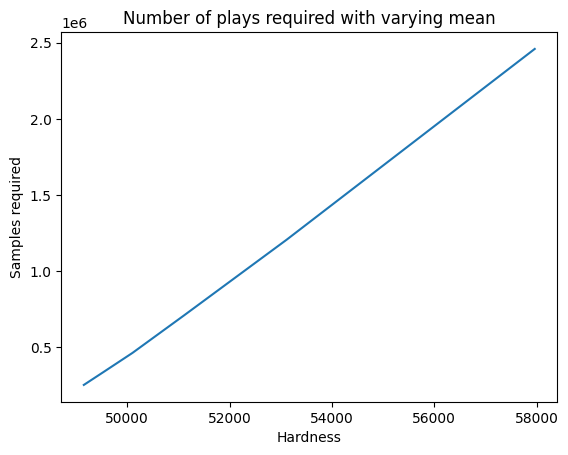

In [36]:
plt.title("Number of plays required with varying mean")
plt.xlabel("Hardness")
plt.ylabel("Samples required")
plt.plot(x_val, samples_ins)
plt.show()

[8421.73074285 5411.67601858 3932.34851493 3085.92809603 2551.44083359
 2143.17997633]


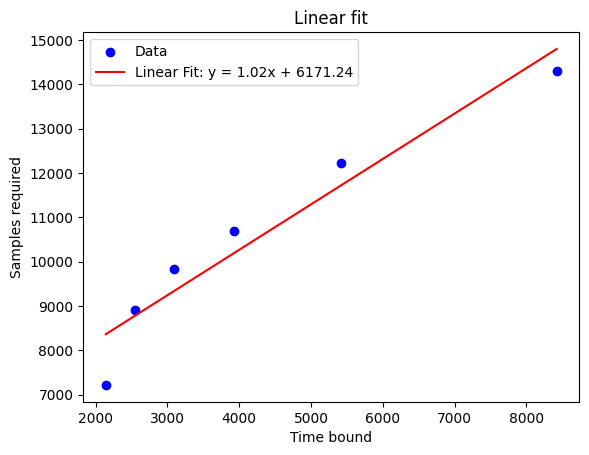

In [55]:
slope, intercept = np.polyfit(time_bound, samples_ins, 1)
time_bound_arr = np.array(time_bound)
print(time_bound_arr)
regression_line = slope * time_bound_arr + intercept
plt.scatter(time_bound, samples_ins, label='Data', color='blue')
plt.plot(time_bound_arr, regression_line, label=f'Linear Fit: y = {slope:.2f}x + {intercept:.2f}', color='red')
plt.xlabel("Time bound")
plt.ylabel("Samples required")
plt.legend()
plt.title("Linear fit")
plt.show()

In [56]:
print(samples_ins)

[14309.84, 12225.36, 10694.76, 9839.16, 8910.36, 7222.4]


In [37]:
print(prob_success)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


#### Case 3

In [ ]:
# self.mu_ij[0] = np.array([0.5, 0.6, 0.6, 0.5, 0.8])               #0.6
#         self.mu_ij[1] = np.array([0.7, 0.5, 0.4, 0.4, 0.6])        #0.58
#         self.mu_ij[2] = np.array([x, 0.5, 0.9, 0.8, 0.9])        #0.68
#         self.mu_ij[3] = np.array([0.6, 0.2, 0.4, 0.7, 0.6])        #0.5
#         self.mu_ij[4] = np.array([0.3, 0.7, 0.4, 0.9, 0.5])        #0.56

# self.ab_array[0] = np.array([[1, 1], [1, 0.67], [1, 0.67], [1, 1], [1, 0.25]])            #0.6
# self.ab_array[1] = np.array([[1, 0.43], [1, 1], [1, 1.5], [1, 1.5], [1, 0.67]])          #0.58
# self.ab_array[2] = np.array([[1, (1/x)-1], [1, 1], [1, 0.11], [1, 0.25], [1, 0.11]])         #0.68
# self.ab_array[3] = np.array([[1, 0.67], [1, 4], [1, 1.5], [1, 0.43], [1, 0.67]])          #0.5
# self.ab_array[4] = np.array([[1, 2.33], [1, 0.43], [1, 1.5], [1, 0.11], [1, 1]])          #0.56

# mu_th = 0.35

# x varies from 0.05 to 0.34

In [34]:
N = 5
M = 5
N_iter = 10
delta_ins = 0.1

samples_ins = []
x_val = []
time_bound = []
prob_success = []

for x in [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]:
    count = [0 for i in range (N+1)]
    samples_all = []
    for i in range (N_iter):
        best_arm_guess, f, samples, h_idx_old, h_idx, delta_i, delta_i_attr = game(M, N, mu_th=0.35, delta=delta_ins)
        samples_all.append(samples)
        count[best_arm_guess] += 1

    samples_ins.append(sum(samples_all)/N_iter)
    # x_val.append(x)
    x_val.append(h_idx)
    time = h_idx * math.log(h_idx/delta_ins)
    time_bound.append(time)
    prob_success.append(count[0]/N_iter)
    print("Done")


Done
Done
Done
Done
Done
Done


In [35]:
print(x_val)
print(samples_ins)

[3660.99655226773, 3665.8854411566185, 3674.8854411566185, 3694.329885601063, 3749.8854411566185, 4049.8854411566185]
[187338.0, 186857.0, 189629.0, 192180.0, 202390.0, 239404.0]


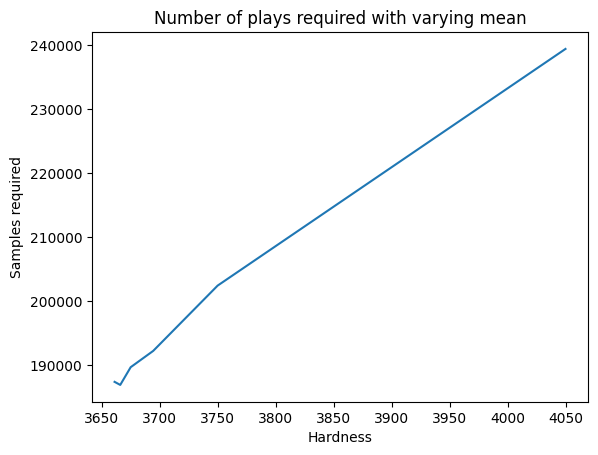

In [36]:
plt.title("Number of plays required with varying mean")
plt.xlabel("Hardness")
plt.ylabel("Samples required")
plt.plot(x_val, samples_ins)
plt.show()

In [37]:
print(samples_ins)

[187338.0, 186857.0, 189629.0, 192180.0, 202390.0, 239404.0]


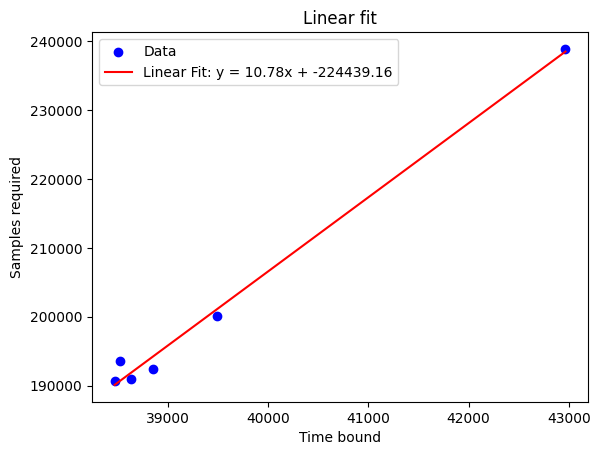

In [57]:
slope, intercept = np.polyfit(time_bound, samples_ins, 1)
time_bound_arr = np.array(time_bound)
regression_line = slope * time_bound_arr + intercept
plt.scatter(time_bound, samples_ins, label='Data', color='blue')
plt.plot(time_bound_arr, regression_line, label=f'Linear Fit: y = {slope:.2f}x + {intercept:.2f}', color='red')
plt.xlabel("Time bound")
plt.ylabel("Samples required")
plt.legend()
plt.title("Linear fit")
plt.show()

In [38]:
print(prob_success)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


#### Case 4a

In [ ]:
# self.mu_ij[0] = np.array([0.5, 0.6, 0.6, 0.5, 0.8])               #0.6
#         self.mu_ij[1] = np.array([0.7, 0.5, 0.4, 0.4, 0.6])        #0.58
#         self.mu_ij[2] = np.array([x, 0.5, 0.4, 0.8, 0.4])        #0.68
#         self.mu_ij[3] = np.array([0.6, 0.2, 0.4, 0.7, 0.6])        #0.5
#         self.mu_ij[4] = np.array([0.3, 0.7, 0.4, 0.9, 0.5])        #0.56

# self.ab_array[0] = np.array([[1, 1], [1, 0.67], [1, 0.67], [1, 1], [1, 0.25]])            #0.6
# self.ab_array[1] = np.array([[1, 0.43], [1, 1], [1, 1.5], [1, 1.5], [1, 0.67]])          #0.58
# self.ab_array[2] = np.array([[1, (1/x)-1], [1, 1], [1, 1.5], [1, 0.25], [1, 1.5]])         #0.68
# self.ab_array[3] = np.array([[1, 0.67], [1, 4], [1, 1.5], [1, 0.43], [1, 0.67]])          #0.5
# self.ab_array[4] = np.array([[1, 2.33], [1, 0.43], [1, 1.5], [1, 0.11], [1, 1]])          #0.56

# mu_th = 0.35

# x varies from 0.05 to 0.28

In [29]:
N = 5
M = 5
N_iter = 10
delta_ins = 0.1

samples_ins = []
x_val = []
time_bound, time_bound_old = [], []
prob_success = []

for x in [0.05, 0.1, 0.15, 0.2, 0.25]:
    count = [0 for i in range (N+1)]
    samples_all = []
    for i in range (N_iter):
        best_arm_guess, f, samples, h_id_old, h_id, delta_i, delta_i_attr = game(M, N, mu_th=0.35, delta=delta_ins)
        samples_all.append(samples)
        count[best_arm_guess] += 1

    samples_ins.append(sum(samples_all)/N_iter)
    # x_val.append(x)
    x_val.append(h_id)
    # time_old = h_id_old * math.log(h_id_old/delta_ins)
    time = h_id * math.log(h_id/delta_ins)
    # time_bound_old.append(time_old)
    time_bound.append(time)
    prob_success.append(count[0]/N_iter)
    print("Done")


Done
Done
Done
Done
Done


In [30]:
print(x_val)
print(samples_ins)

[3660.9965522677294, 3665.8854411566185, 3674.8854411566185, 3694.329885601063, 3749.8854411566185]
[187098.0, 189606.0, 199158.0, 195490.0, 202876.0]


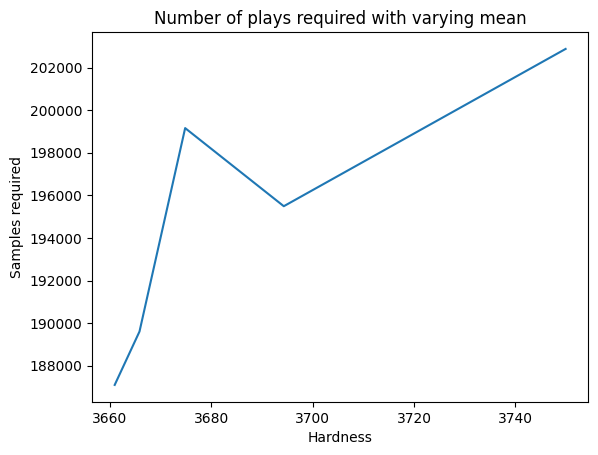

In [31]:
plt.title("Number of plays required with varying mean")
plt.xlabel("Hardness")
plt.ylabel("Samples required")
plt.plot(x_val, samples_ins)
plt.show()

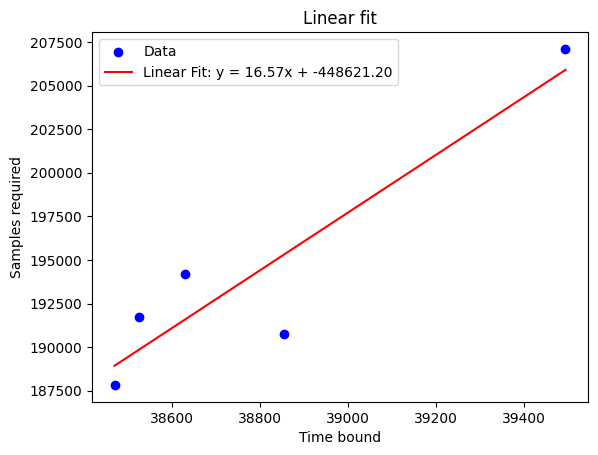

In [72]:
slope, intercept = np.polyfit(time_bound, samples_ins, 1)
time_bound_arr = np.array(time_bound)
regression_line = slope * time_bound_arr + intercept
plt.scatter(time_bound, samples_ins, label='Data', color='blue')
plt.plot(time_bound_arr, regression_line, label=f'Linear Fit: y = {slope:.2f}x + {intercept:.2f}', color='red')
plt.xlabel("Time bound")
plt.ylabel("Samples required")
plt.legend()
plt.title("Linear fit")
plt.show()

In [73]:
print(samples_ins)

[187830.0, 191725.0, 194187.0, 190725.0, 207105.0]


In [74]:
print(prob_success)

[1.0, 1.0, 1.0, 1.0, 1.0]


#### Case 4b

In [ ]:
# self.mu_ij[0] = np.array([0.5, 0.6, 0.6, 0.5, 0.8])               #0.6
#         self.mu_ij[1] = np.array([0.7, 0.5, 0.4, 0.4, 0.6])        #0.58
#         self.mu_ij[2] = np.array([0.3, 0.5, 0.4, 0.8, x])        #0.68
#         self.mu_ij[3] = np.array([0.34, 0.34, 0.8, 0.7, 0.5])        #0.5
#         self.mu_ij[4] = np.array([0.34, 0.7, 0.4, 0.9, 0.5])        #0.56  

# self.ab_array[0] = np.array([[1, 1], [1, 0.67], [1, 0.67], [1, 1], [1, 0.25]])            #0.6
# self.ab_array[1] = np.array([[1, 0.43], [1, 1], [1, 1.5], [1, 1.5], [1, 0.67]])          #0.58
# self.ab_array[2] = np.array([[1, 2.33], [1, 1], [1, 1.5], [1, 0.25], [1, (1/x)-1]])         #0.68
# self.ab_array[3] = np.array([[1, 1.94], [1, 1.94], [1, 0.25], [1, 0.43], [1, 1]])          #0.5
# self.ab_array[4] = np.array([[1, 1.94], [1, 0.43], [1, 1.5], [1, 0.11], [1, 1]])          #0.56

# mu_th = 0.35

# x varies from 0.05 to 0.34

In [23]:
N = 5
M = 5
N_iter = 5
delta_ins = 0.1

samples_ins = []
x_val = []
time_bound, time_bound_old = [], []
prob_success = []

# for x in [0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48]:
for x in [0.36, 0.39, 0.42, 0.45, 0.48]:
# for x in [0.4, 0.42, 0.44, 0.45]:
    count = [0 for i in range (N+1)]
    samples_all = []
    for i in range (N_iter):
        best_arm_guess, f, samples, h_id_old, h_id, delta_i, delta_i_attr = game(M, N, mu_th=0.35, delta=delta_ins)
        samples_all.append(samples)
        count[best_arm_guess] += 1

    samples_ins.append(sum(samples_all)/N_iter)
    # x_val.append(x)
    x_val.append(h_id)
    # time_old = h_id_old * math.log(h_id_old/delta_ins)
    time = h_id * math.log(h_id/delta_ins)
    # time_bound_old.append(time_old)
    time_bound.append(time)
    prob_success.append(count[0]/N_iter)
    print("Done")


Done
Done
Done
Done
Done


In [24]:
print(x_val)
print(samples_ins)

[9947.834411980708, 9972.760105121502, 10001.671791249817, 10035.466982530681, 10075.310792638411]
[1017405.0, 1054641.0, 1033079.0, 1054495.0, 1047163.0]


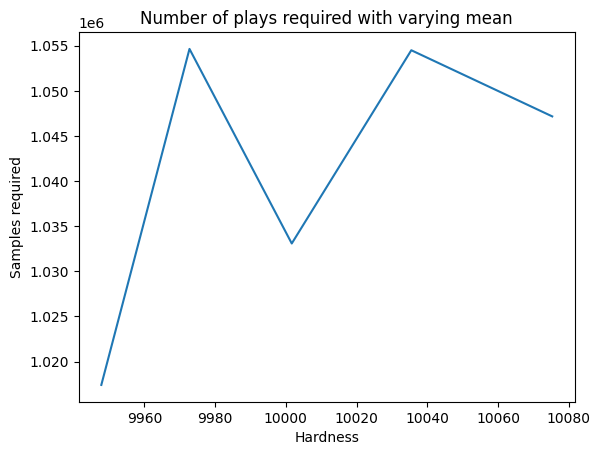

In [26]:
plt.title("Number of plays required with varying mean")
plt.xlabel("Hardness")
plt.ylabel("Samples required")
plt.plot(x_val, samples_ins)
plt.show()

[140991.6072706  720978.61143054   8626.03603981   9198.68902063
  10446.50035001  11714.76087135]


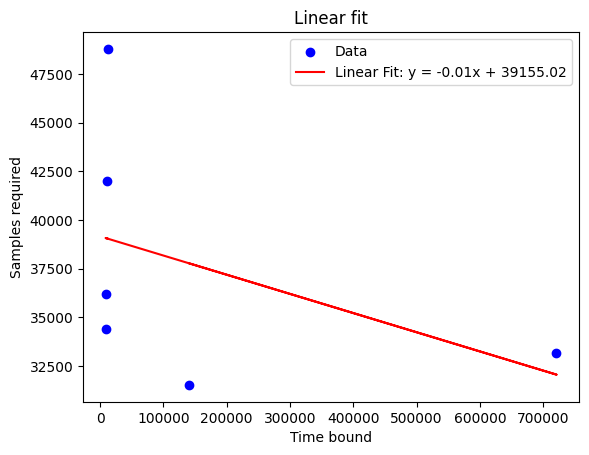

In [64]:
slope, intercept = np.polyfit(time_bound, samples_ins, 1)
time_bound_arr = np.array(time_bound)
print(time_bound_arr)
regression_line = slope * time_bound_arr + intercept
plt.scatter(time_bound, samples_ins, label='Data', color='blue')
plt.plot(time_bound_arr, regression_line, label=f'Linear Fit: y = {slope:.2f}x + {intercept:.2f}', color='red')
plt.xlabel("Time bound")
plt.ylabel("Samples required")
plt.legend()
plt.title("Linear fit")
plt.show()

In [65]:
print(time_bound)
print(samples_ins)

[140991.60727059975, 720978.6114305445, 8626.036039814335, 9198.689020634738, 10446.500350005703, 11714.760871352073]
[31521.96, 33163.64, 34385.56, 36170.6, 42015.4, 48785.64]


In [66]:
print(samples_ins)

[31521.96, 33163.64, 34385.56, 36170.6, 42015.4, 48785.64]


#### Case 6

In [51]:
# self.mu_ij[0] = np.array([x, 0.6, 0.6, 0.55])        #0.575 - 0.625 - best	x-> 0.55 to 0.75
#         self.mu_ij[1] = np.array([0.2, 0.9, 0.8, 0.9])        #0.7 - infeasible
#         self.mu_ij[2] = np.array([0.3, 0.9, 0.9, 0.9])        #0.75 - infeasible
#         self.mu_ij[3] = np.array([0.2, 0.9, 0.8, 0.8])        #0.725 - infeasible
#         self.mu_ij[4] = np.array([0.2, 0.8, 0.8, 0.8])        #0.65 - infeasible

# self.ab_array[0] = np.array([[1, (1/x) - 1], [1, 0.67], [1, 0.67], [1, 0.82]])               #0.5
# self.ab_array[1] = np.array([[1, 4], [1, 0.11], [1, 0.25], [1, 0.11]])       #0.2
# self.ab_array[2] = np.array([[1, 2.33], [1, 0.11], [1, 0.11], [1, 0.11]])               #0.3
# self.ab_array[3] = np.array([[1, 4], [1, 0.11], [1, 0.25], [1, 0.25]])                  #0.4
# self.ab_array[4] = np.array([[1, 4], [1, 0.25], [1, 0.25], [1, 0.25]])                #0.3

# mu_th = 0.5

# arms in set (infeasible intersection suboptimal)
# max(delta_i/2, delta_i_attr)
# delta_i/2 < delta_i_attr

# 3 arms infeasible, all of them suboptimal
# x, 1-x, x varying from 0.35 to 0.1
# x = 0.1,0.8 mean = 0.45, delta_i/2 = 0.075
# x = 0.3,0.8 mean = 0.55, delta_i/2 = 0.025
# x = 0.35, 0.8, mean = 0.575, delta_i/2 = 0.0125

############## from 4b modif - best arm is infeasible #################

In [61]:
N = 5
M = 4
N_iter = 10
delta_ins = 0.1

samples_ins_4 = []
x_val = []
time_bound, time_bound_old = [], []
prob_success = []

for x in [0.55, 0.6, 0.65, 0.7, 0.75]:
    count = [0 for i in range (N+1)]
    samples_all = []
    for i in range (N_iter):
        best_arm_guess, f, samples, h_id_old, h_id, delta_i, delta_i_attr = game(M, N, mu_th=0.5, delta=delta_ins)
        samples_all.append(samples)
        count[best_arm_guess] += 1

    samples_ins_4.append(sum(samples_all)/N_iter)
    # x_val.append(x)
    x_val.append(1/delta_i_attr[0])
    # time_old = h_id_old * math.log(h_id_old/delta_ins)
    # print(h_id)
    time = h_id * math.log(h_id/delta_ins)
    # time_bound_old.append(time_old)
    time_bound.append(time)
    prob_success.append(count[0]/N_iter)
    print("Done")

Done
Done
Done
Done
Done


In [57]:
print(samples_ins_4)

[33797.0, 32317.0, 34405.4, 34328.2, 35349.4]


In [55]:
print(prob_success)

[1.0, 1.0, 1.0, 1.0, 1.0]


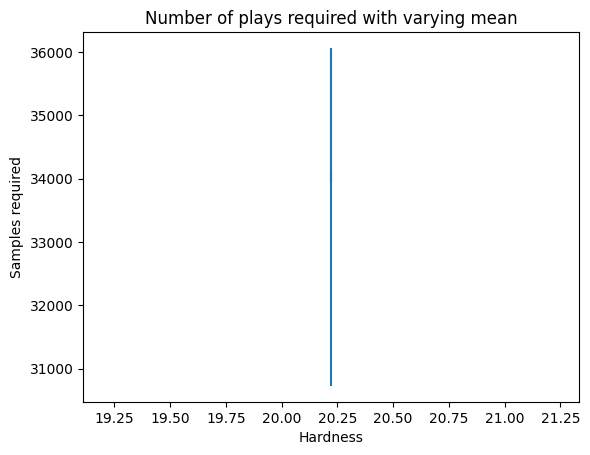

In [62]:
plt.title("Number of plays required with varying mean")
plt.xlabel("Hardness")
plt.ylabel("Samples required")
plt.plot(x_val, samples_ins_4)
plt.show()

# Plotting

In [32]:
with open(filename, 'r') as file:
    # Create a CSV reader object
    reader = csv.reader(file)

    # Create a list to store the rows
    rows = []

    # Iterate over each row in the CSV file
    for row in reader:
        # Append the row to the list
        rows.append(row)

    # Modify the 4th row
    rows[0] = x_val
    rows[1] = samples_ins

# Open the CSV file in write mode
with open(filename, 'w', newline='') as file:
    # Create a CSV writer object
    writer = csv.writer(file)

    # Write the modified rows to the CSV file
    writer.writerows(rows)